In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler




In [21]:

# Load the dataset
dataset = pd.read_csv('cardio_train.csv', delimiter=';')
dataset.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<Axes: >

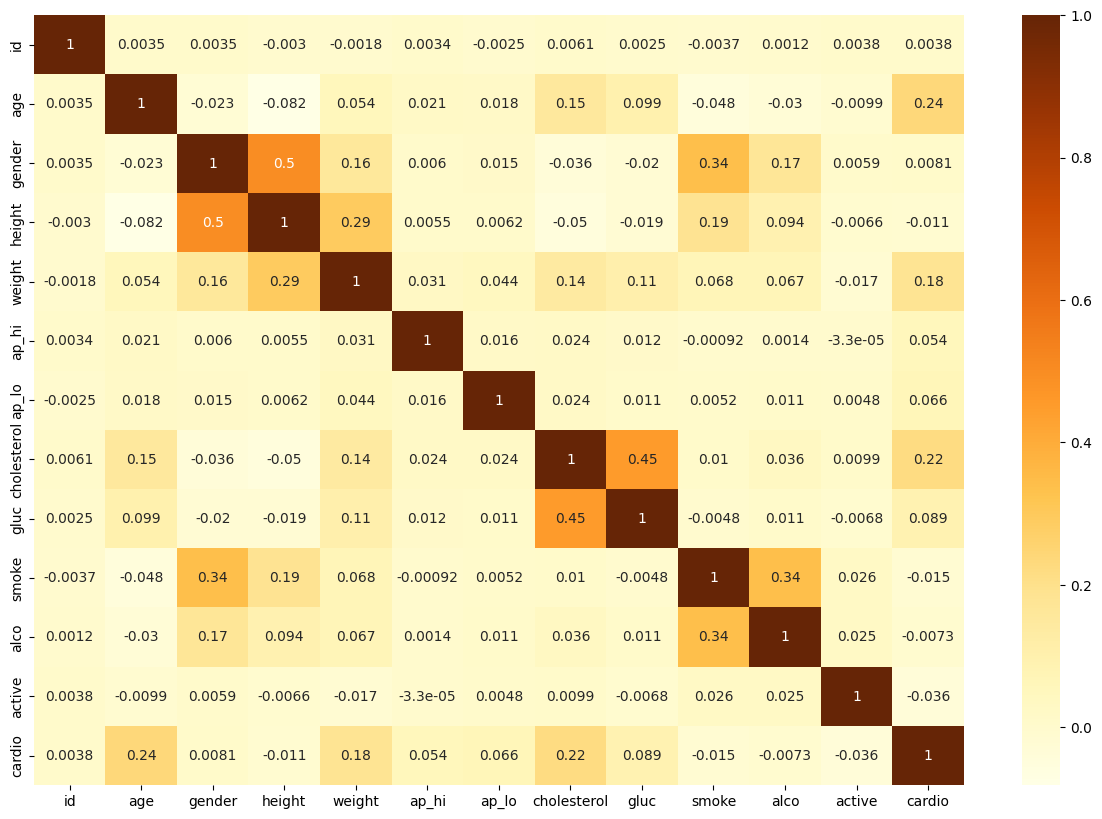

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap='YlOrBr')

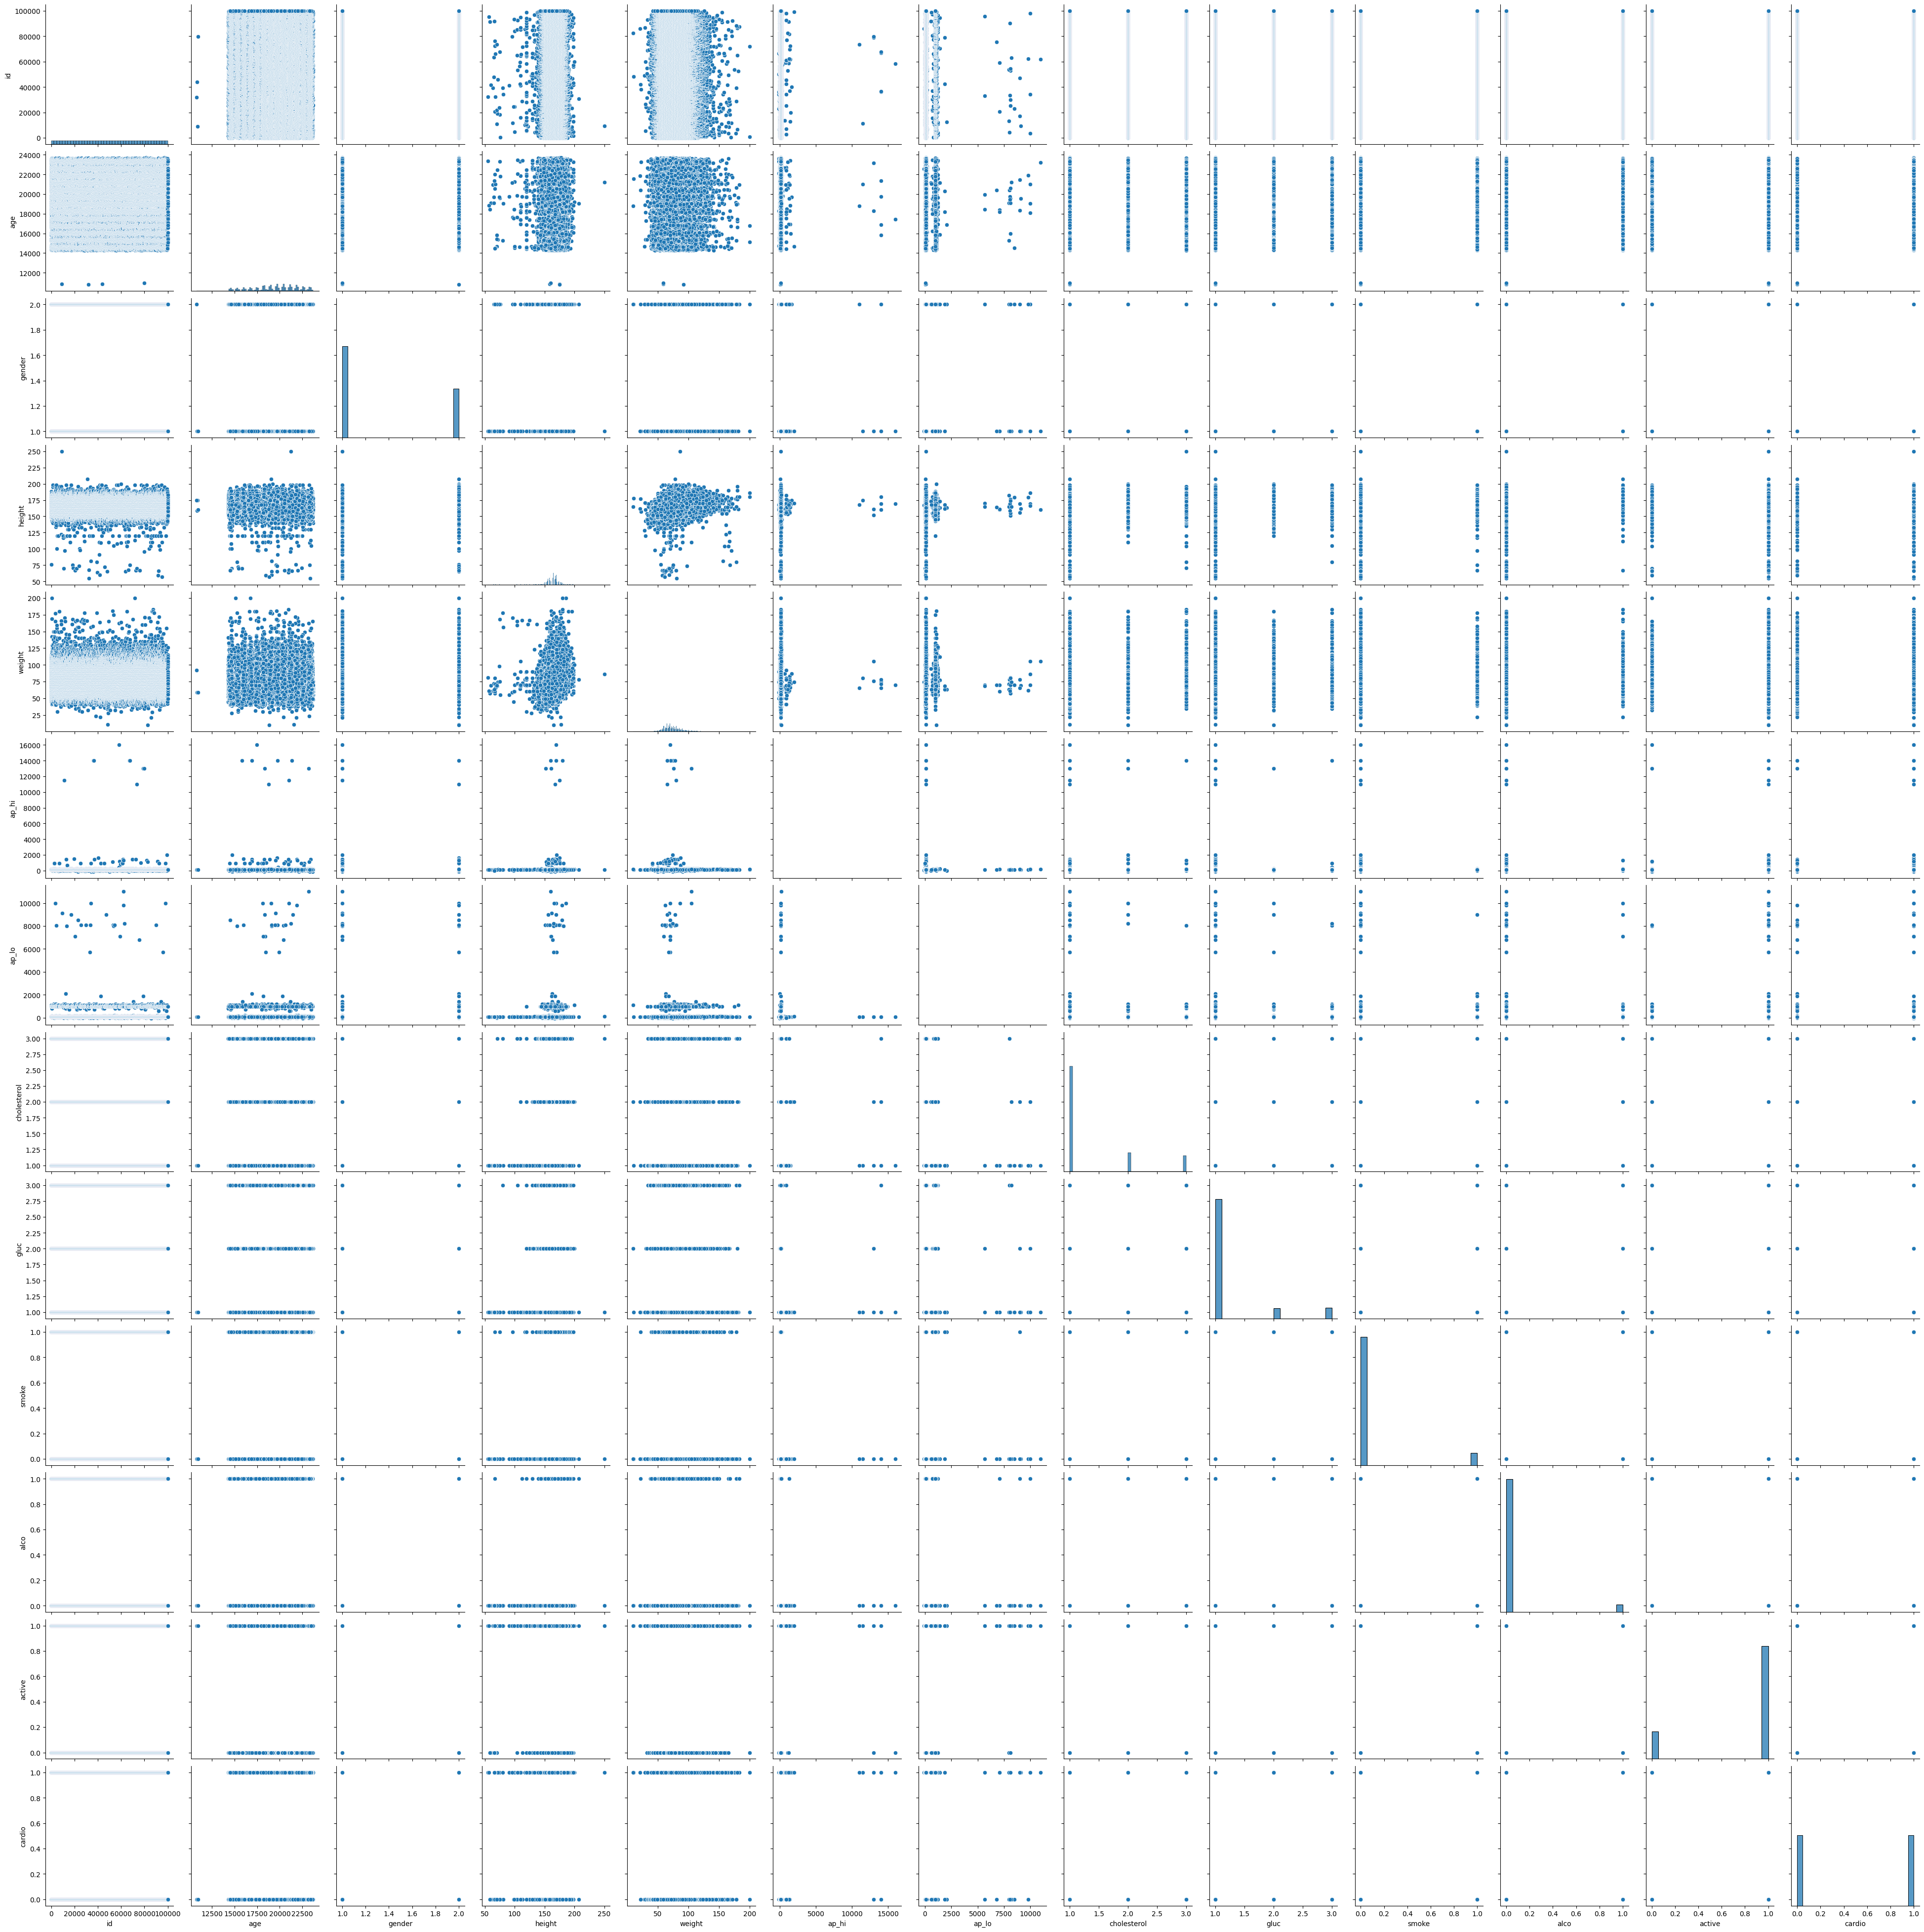

In [23]:
import seaborn as sns
g = sns.pairplot(dataset)
g.fig.set_size_inches(40,40)

In [24]:
# Extract features and target variable
X = dataset.drop(['id', 'cardio'], axis=1)
y = dataset['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
threshold = 0.2
y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 52.34%

Confusion Matrix:
[[ 390 6598]
 [  75 6937]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.06      0.10      6988
           1       0.51      0.99      0.68      7012

    accuracy                           0.52     14000
   macro avg       0.68      0.52      0.39     14000
weighted avg       0.68      0.52      0.39     14000



In [25]:
threshold = 0.4
y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 66.73%

Confusion Matrix:
[[3426 3562]
 [1096 5916]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.49      0.60      6988
           1       0.62      0.84      0.72      7012

    accuracy                           0.67     14000
   macro avg       0.69      0.67      0.66     14000
weighted avg       0.69      0.67      0.66     14000



In [26]:
threshold = 0.5
y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 69.81%

Confusion Matrix:
[[5103 1885]
 [2341 4671]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



In [27]:
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 60.54%

Confusion Matrix:
[[4524 2464]
 [3061 3951]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6988
           1       0.62      0.56      0.59      7012

    accuracy                           0.61     14000
   macro avg       0.61      0.61      0.60     14000
weighted avg       0.61      0.61      0.60     14000



In [28]:
model = SVC(kernel='poly', degree=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 60.44%

Confusion Matrix:
[[3923 3065]
 [2474 4538]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      6988
           1       0.60      0.65      0.62      7012

    accuracy                           0.60     14000
   macro avg       0.61      0.60      0.60     14000
weighted avg       0.61      0.60      0.60     14000



In [31]:
import tensorflow as tf


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
#y_pred = np.round(y_pred_proba).flatten()

# Convert predicted probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Epoch 1/10
1400/1400 [==============================] - 8s 4ms/step - loss: 0.6008 - accuracy: 0.6832 - val_loss: 0.5680 - val_accuracy: 0.7212
Epoch 2/10
1400/1400 [==============================] - 5s 3ms/step - loss: 0.5619 - accuracy: 0.7238 - val_loss: 0.5575 - val_accuracy: 0.7321
Epoch 3/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5539 - accuracy: 0.7283 - val_loss: 0.5508 - val_accuracy: 0.7316
Epoch 4/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5491 - accuracy: 0.7285 - val_loss: 0.5461 - val_accuracy: 0.7347
Epoch 5/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5468 - accuracy: 0.7303 - val_loss: 0.5447 - val_accuracy: 0.7353
Epoch 6/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.5451 - accuracy: 0.7321 - val_loss: 0.5433 - val_accuracy: 0.7357
Epoch 7/10
1400/1400 [==============================] - 3s 2ms/step - loss: 0.5440 - accuracy: 0.7322 - val_loss: 0.5434 - val_accuracy:

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the MLP model
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 73.57%

Confusion Matrix:
[[5604 1384]
 [2316 4696]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.67      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000

